# Analysis of the Gravity wave drag

In [1]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

from definitions import * # imports all functions from definitions.py

In [2]:
station = 'Leipzig'

In [3]:
# Parameters
station = "Leipzig"


In [4]:
if station == 'Leipzig':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2004-08-01_2020-12-01_Col.nc'
elif station == 'CMOR':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2002-01-01_2020-11-01_CMA.nc'
elif station == 'Esrange':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_1999-08-01_2021-03-01_Kir.nc'
elif station == 'Sodankyla':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2008-10-01_2021-03-01_Sod.nc'
elif station == 'Davis':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2005-01-01_2020-12-01_Dav.nc'
elif station == 'RioGrande':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_2008-02-01_2021-01-01_Rio.nc'
elif station == 'Sodankyla_Kiruna':
    dir = '/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/GWD_1999-08-01_2019-12-01_SES.nc'

In [5]:
ds=xr.open_dataset(dir)

In [6]:
ds

<xarray.Dataset>
Dimensions:  (alt: 26, time: 143928)
Coordinates:
    month    (time) int64 ...
  * alt      (alt) int64 70 72 74 76 78 80 82 84 ... 108 110 112 114 116 118 120
  * time     (time) datetime64[ns] 2004-08-01 ... 2020-12-31T23:00:00
Data variables:
    GWD      (time, alt) float64 ...
Attributes:
    history:  Tue Jun  1 17:50:35 2021: ncrename -v __xarray_dataarray_variab...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [7]:
gwd = ds['GWD'] 

gwd_anomalie = anomalie('day',gwd)

sea_gwd = sea(40,station,gwd)
sea_gwd_anomalie = sea(40,station,gwd_anomalie)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## Climatology

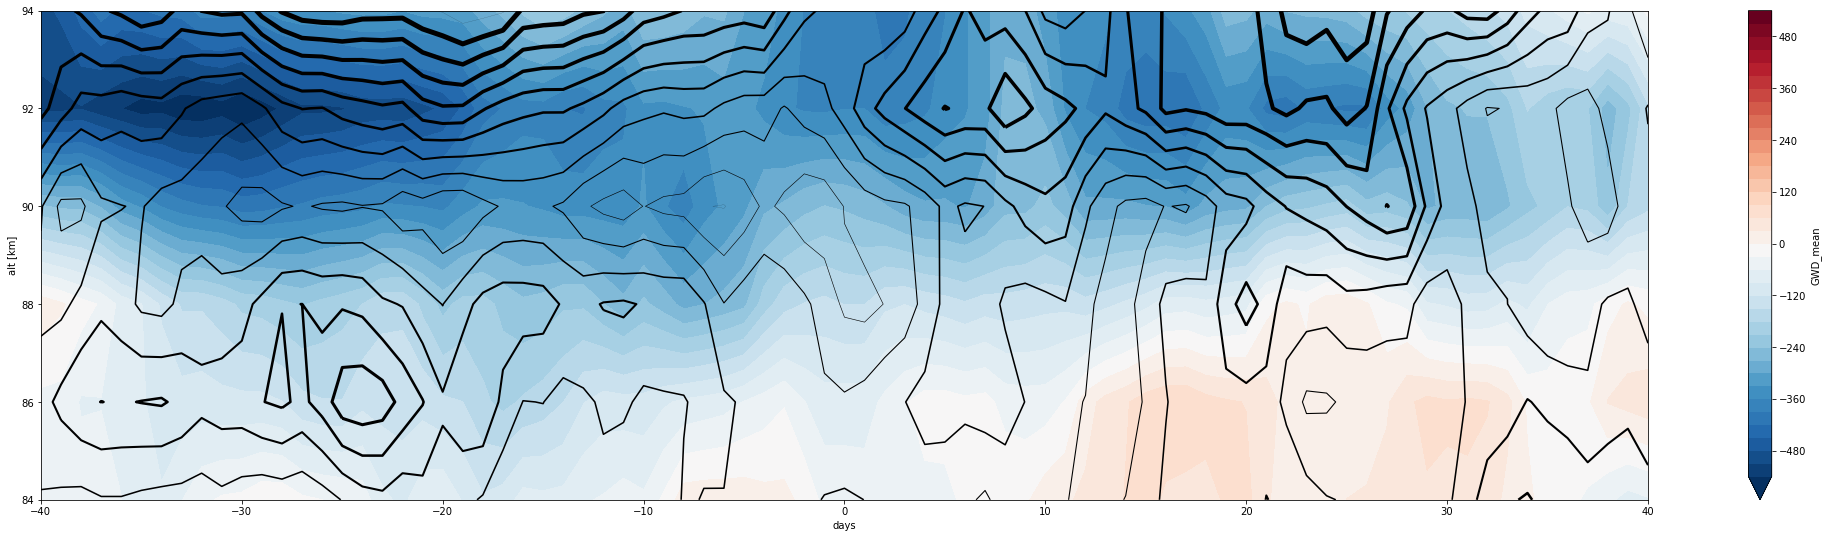

In [8]:
plotting_routine(sea_gwd,'GWD')

## Anomalies

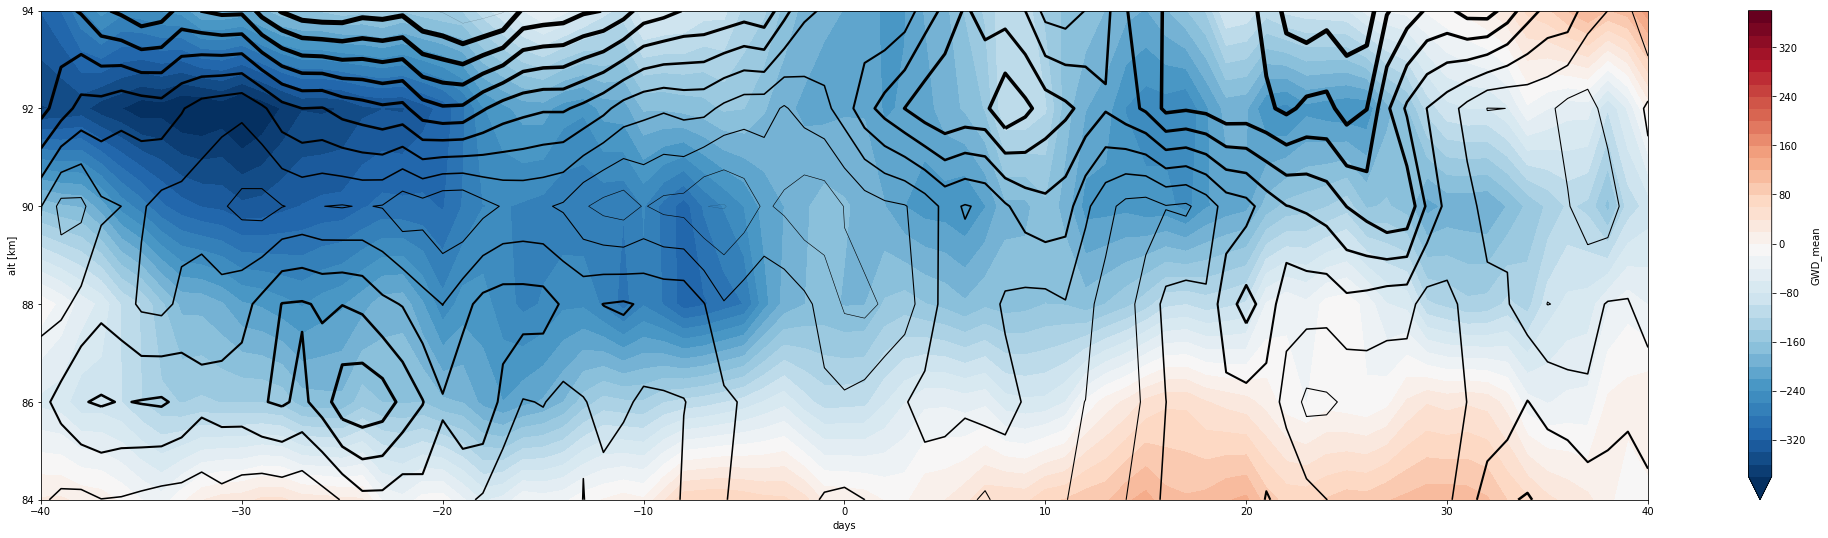

In [9]:
plotting_routine(sea_gwd_anomalie,'GWD')

## Individual events

In [10]:
def sea_individual(days_period,station,var):
    df_dates = pd.read_csv(dir_path+'dates/without_final_warmings/ssw_dates_without_final_warmings_'+station+'.csv') # you can load SSWs from a csv file like attached
    dates = df_dates.set_index('BeginDate')

    xa_ls = []
    
    print(dates.index)
    
    for days in dates.index:
        
        td = pd.Timedelta(str(days_period)+' days')  # define timedelta e.g., +/- 30 days 
        comp_m = var.sel(time = slice(pd.to_datetime(days)-td,pd.to_datetime(days)+td))  # select the data in the time range around the SSW onset
        comp_m['time'] = np.linspace(-days_period,days_period,comp_m.time.shape[0])  # set the time dimension of comp_m to an array of +/- the period
        xa_ls.append(comp_m)  # xa_ls is an array of the datasets of all single events
        
   
    xa_comp = xr.concat(xa_ls, dim = 'event')  # assign 'event' as new dimension to the data array --> new array xa_comp
    xa_comp['event'] = dates.index.values   # xa_comp has now the dimension 'event' and the values of this dimension are the indices of dates (i.e. the dates of the SSW onsets)

    return xa_comp

In [11]:
sea_gwd_individual = sea_individual(40,station,gwd)
sea_gwd_anomalie_individual = sea_individual(40,station,gwd_anomalie)

Index(['2006-01-21', '2007-02-24', '2008-02-22', '2009-01-24', '2010-02-09',
       '2013-01-06', '2018-02-12'],
      dtype='object', name='BeginDate')
Index(['2006-01-21', '2007-02-24', '2008-02-22', '2009-01-24', '2010-02-09',
       '2013-01-06', '2018-02-12'],
      dtype='object', name='BeginDate')


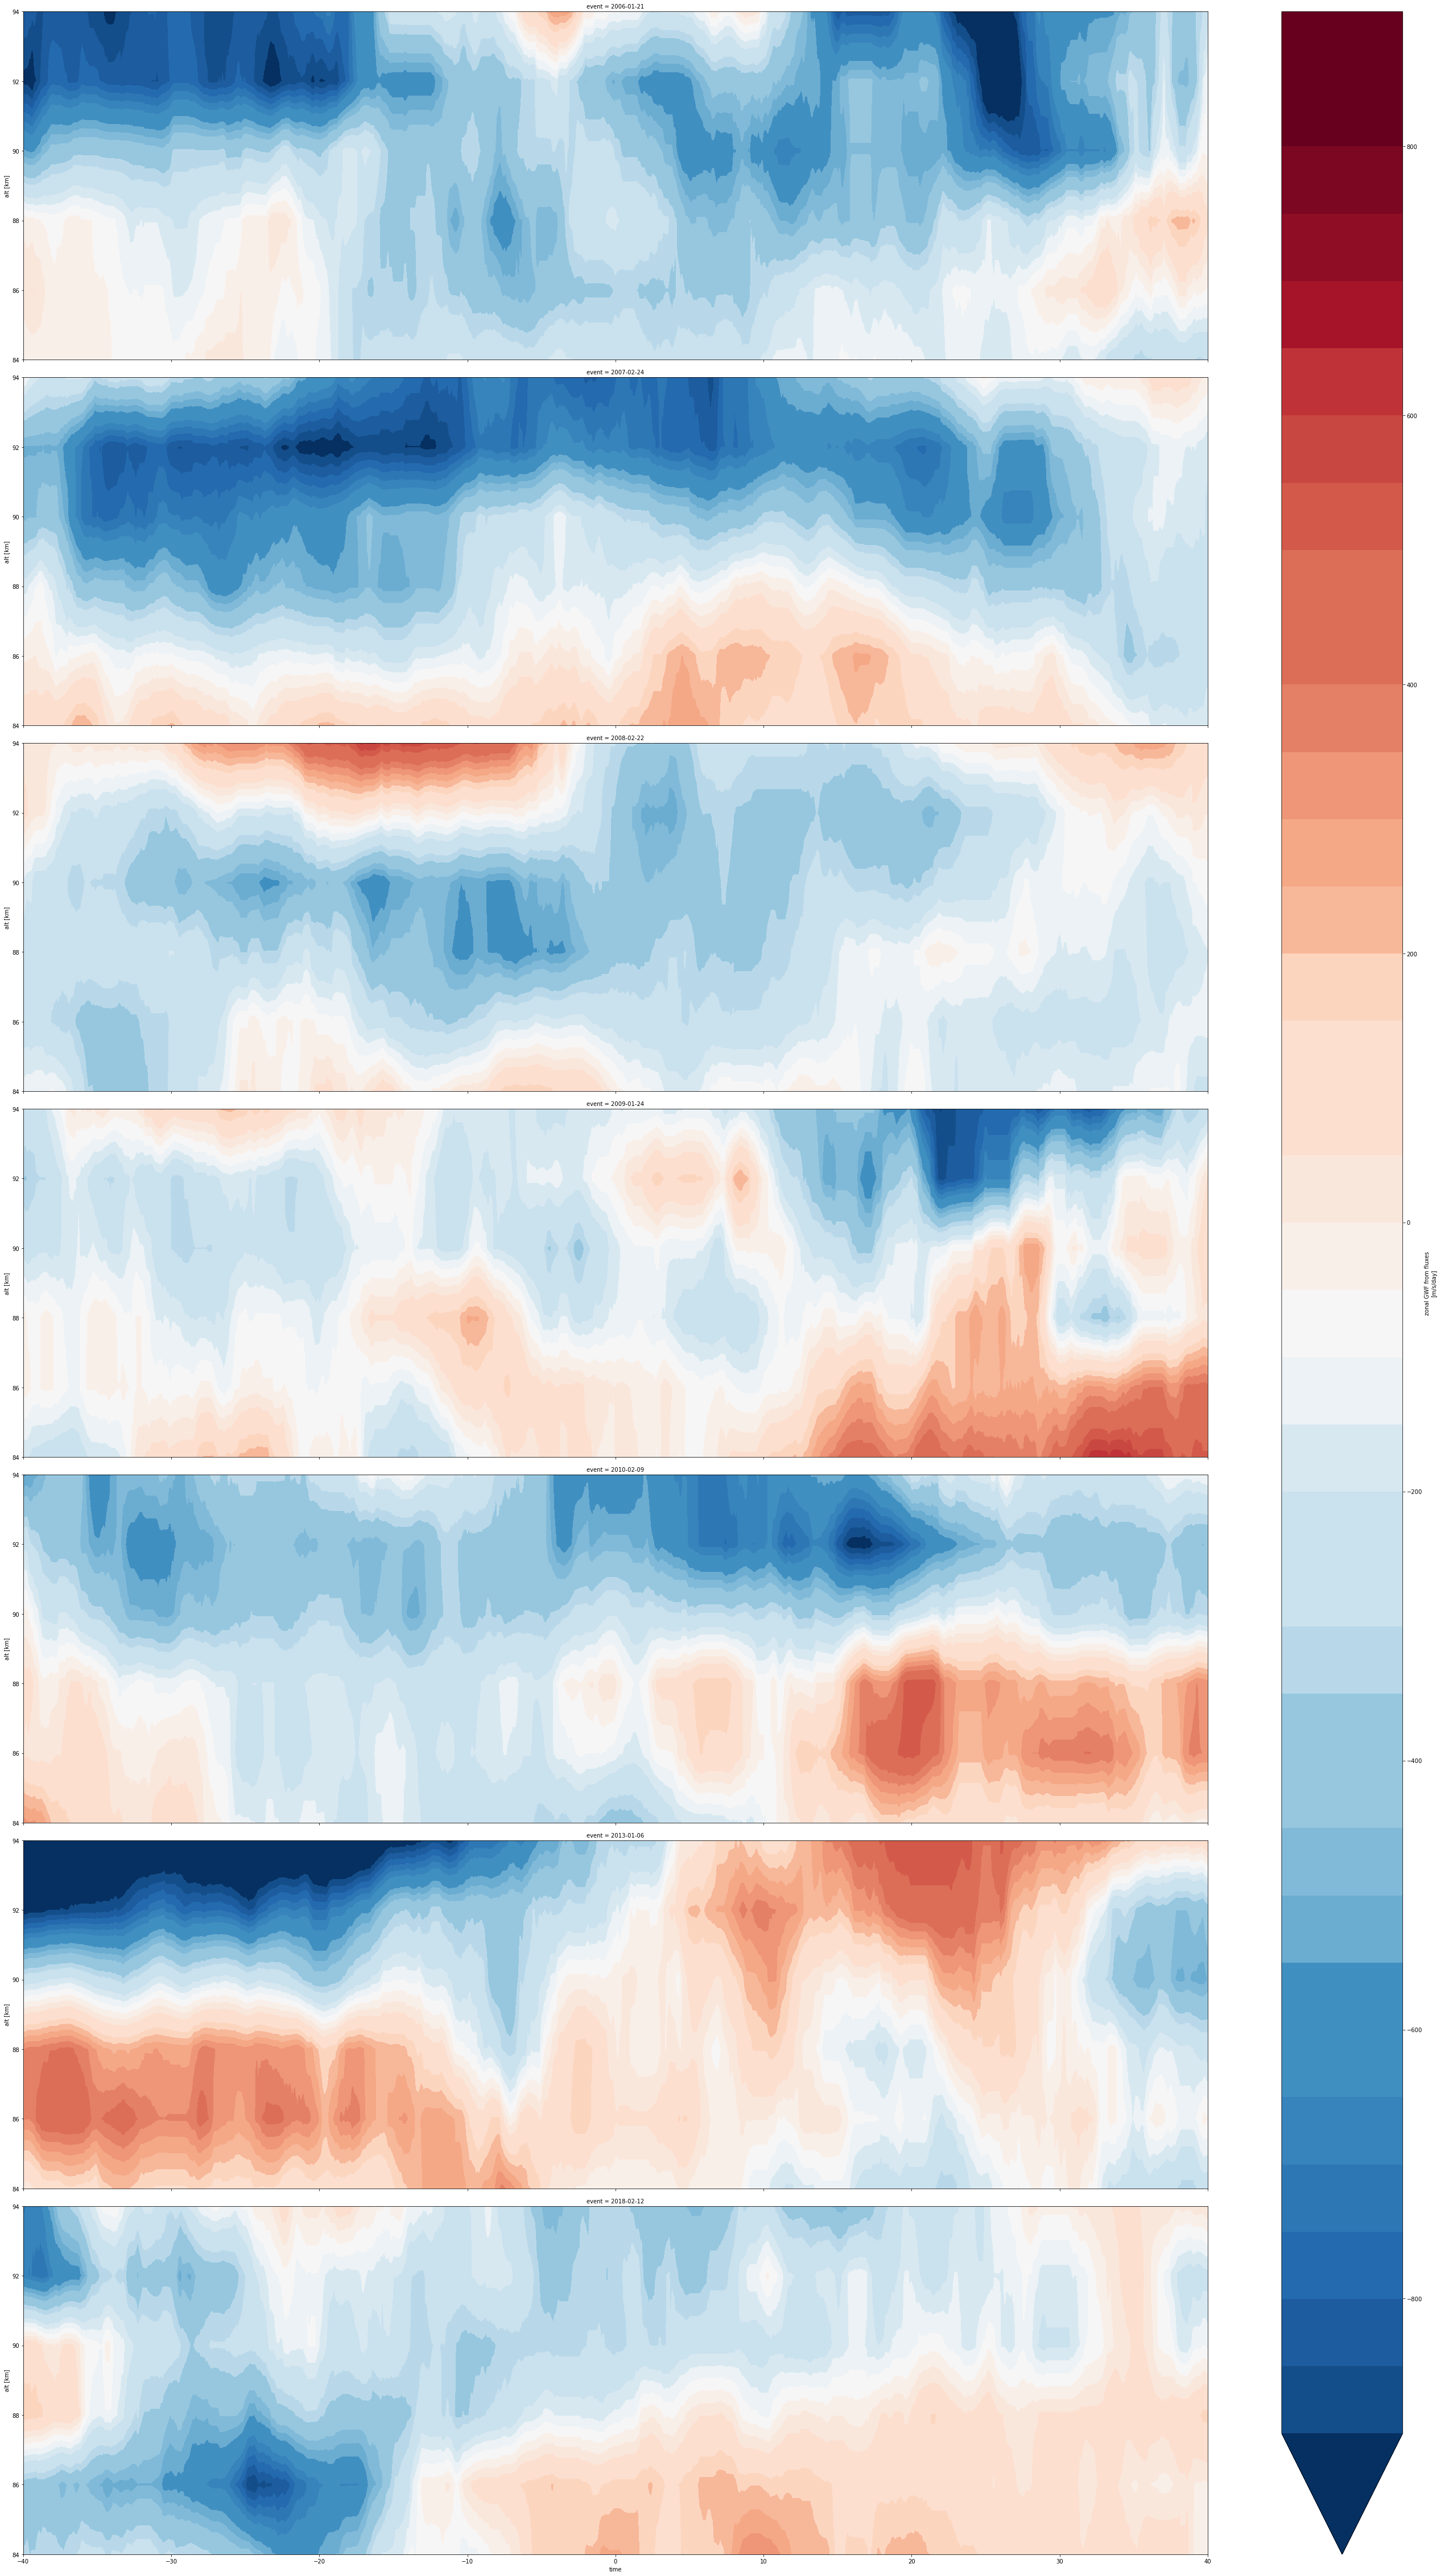

In [12]:
p = sea_gwd_individual.sel(alt = slice(84,95)).plot.contourf(x='time', row='event', size=9,robust=True, levels =41, aspect=4)

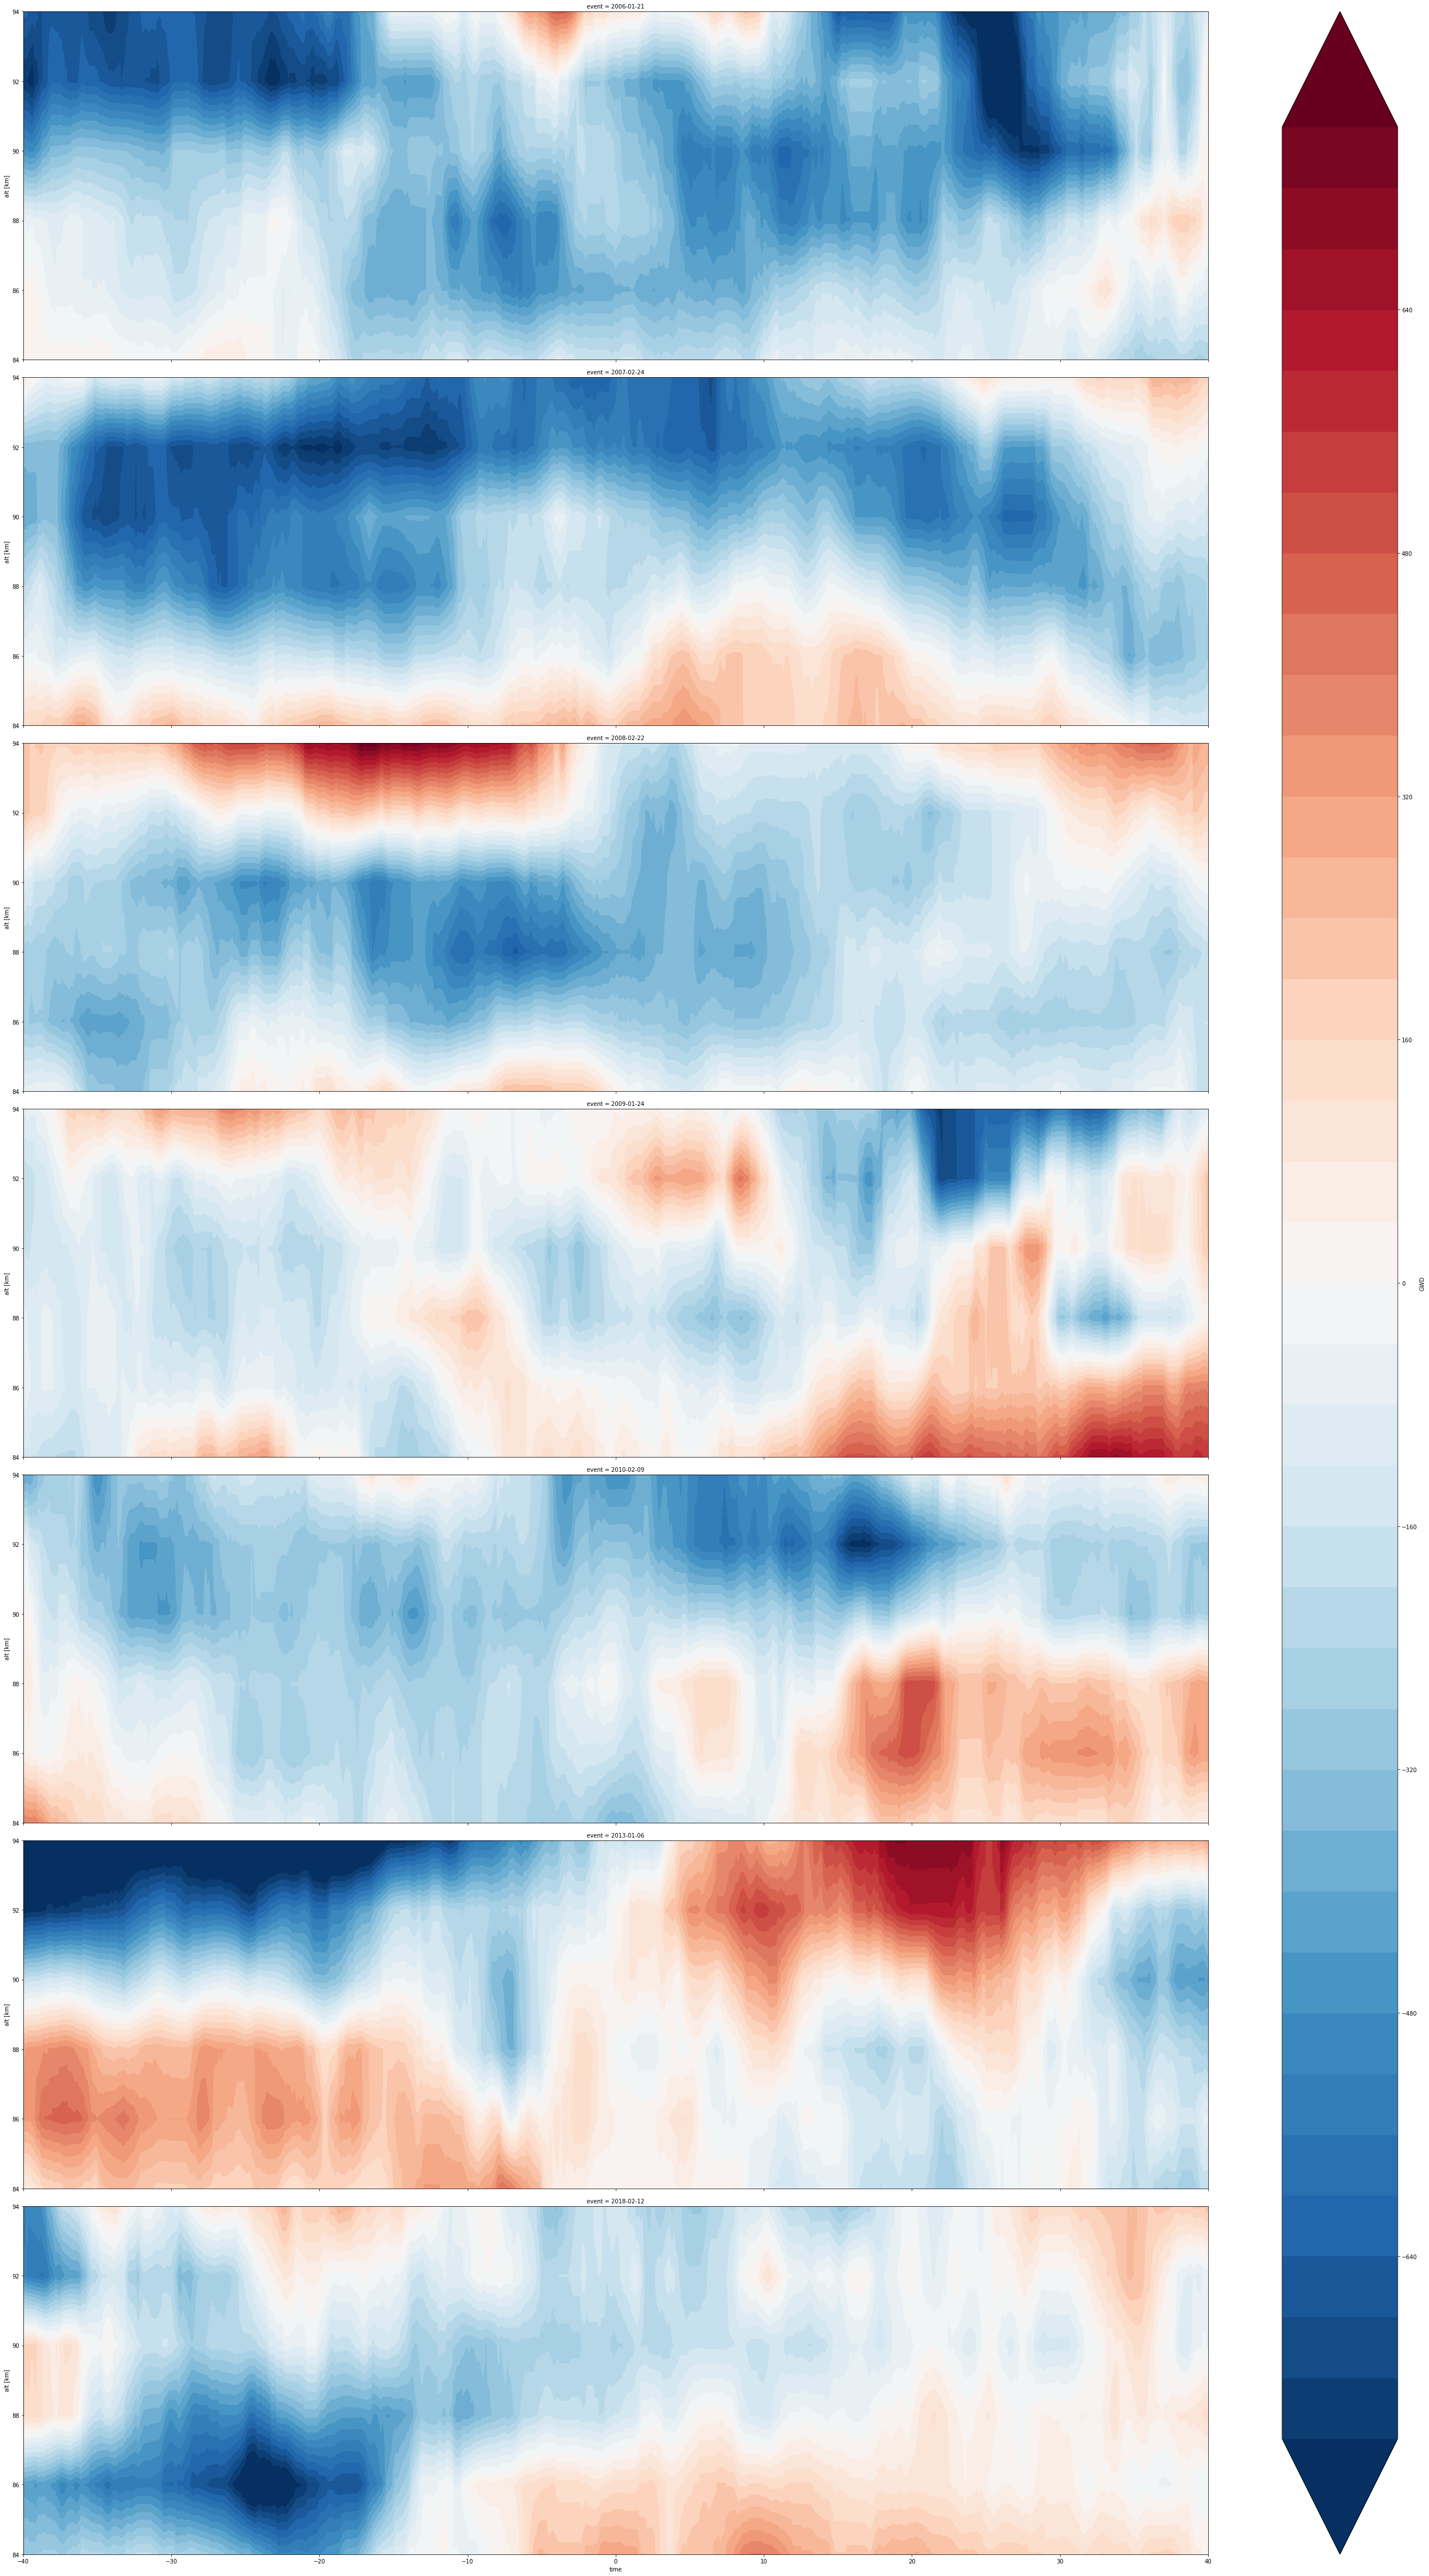

In [13]:
p = sea_gwd_anomalie_individual.sel(alt = slice(84,95)).plot.contourf(x='time', row='event', size=9,robust=True, levels =41, aspect=4)